In [1]:
import sys
import os
sys.path.append("C:/Users/lebobcrash/Documents/GitHub/pygeomod/pygeomod")
sys.path.append("../pygeomod/pygeomod")
sys.path.append("C:/Users/lebobcrash/Documents/GitHub/GeMpy/GeMpy")
sys.path.append("../GeMpy/GeMpy")
sys.path.append("C:/Users/lebobcrash/Documents/GitHub/pynoddy/")
sys.path.append("../pynoddy")
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
import matplotlib
import matplotlib.cm as cm
from skimage import measure
import theano.tensor as T
import GeoMig
reload(GeoMig)
import PosteriorAnalysis as pa
from PosteriorAnalysis import Utility
reload(Utility)
import pynoddy.history
import pynoddy.output
import pynoddy.experiment
import pymc
import pandas as pn
import matplotlib as mpl
import pymc
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
np.set_printoptions(precision = 6, linewidth= 130, suppress =  True)
import pickle
%matplotlib inline
plt.style.use("seaborn-colorblind")

### Load Database

In [2]:
data = pa.PosteriorAnalysis("PGM3_run2.hdf5", "gempy")

### IE

In [3]:
data.compute_entropy()

Per-voxel IE has been saved into self.entropy_voxels and the total IE into self.entropy_total.


In [4]:
data.entropy_total

0.21343466796874999

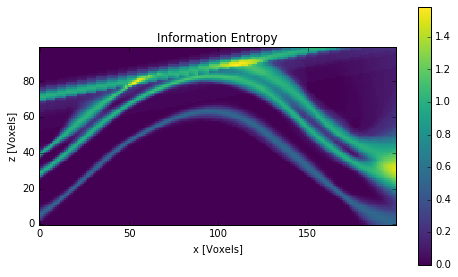

In [11]:
data.plot_entropy()

In [5]:
ie = data.entropy_voxels[:,0,:]
ie_max = np.max(ie)
print ie_max

1.58296


In [137]:
data.entropy_total

0.21343466796874999

In [74]:
import copy
section = copy.copy(data.blocks[4133,:,0,:])
section[section==4.]=5
section[section==0.]=4

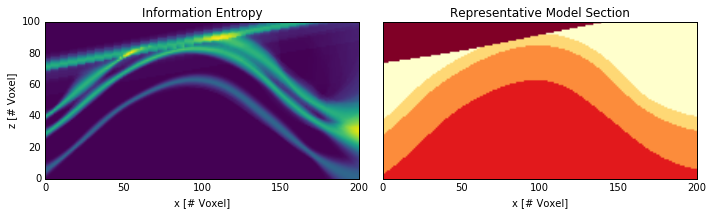

In [75]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=False, figsize=(10,5.5))


ax[0].imshow(ie.T, origin="lower", cmap="viridis")
ax[1].imshow(section.T, origin="lower", cmap="YlOrRd")

for i in range(2):
    ax[i].set_xlim(0,200)
    ax[i].set_ylim(0,100)
    ax[i].set_xlabel("x [# Voxel]")
    ax[i].set_adjustable('box-forced')
    ax[i].xaxis.set_ticks_position('none')
    ax[i].yaxis.set_ticks_position('none')
    
ax[0].set_ylabel("z [# Voxel]")
ax[0].set_title("Information Entropy")
ax[1].set_title("Representative Model Section")
    
plt.tight_layout()
plt.savefig("D:/lebobcrash/MyDocuments/GitHub/thesis_paper_latex/figures/PGM3_comp.pdf")

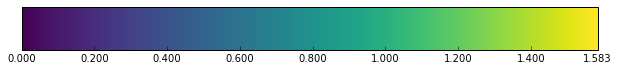

In [8]:
plt.figure(figsize=(10,1))
im = plt.imshow(ie, cmap="viridis", vmin=0., vmax=ie_max)
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
cb = plt.colorbar(im, orientation="horizontal", cax=cax)
#cb.set_label("Information Entropy")
ticker = np.arange(0,1.583,0.2)
ticker = np.append(ticker,ie_max)
cb.set_ticks(ticker)

# save
plt.savefig("D:/lebobcrash/MyDocuments/GitHub/thesis_paper_latex/figures/PGM3_composite_cbar.pdf")

# Flow of Inference

In [9]:
data2 = pa.PosteriorAnalysis("PGM2_5_gempy_BI_run2.hdf5", "gempy")
data3 = pa.PosteriorAnalysis("PGM2_5_pynoddy_BI_topo_run5.hdf5", "pynoddy")

In [10]:
import seaborn as sns
sns.set_style("white")
sns.set_context("paper", font_scale=1.3)

In [ ]:
data2.compute_entropyte_entropy()

# KDE Plot Export

In [6]:
fs=1.8

In [7]:
sns.set_style("white")
sns.set_context("paper", font_scale=fs)

p1 = sns.jointplot(data3.db.trace("fold_wavelength")[:],
                  data2.db.trace("Layer3_x20_y0")[:], kind="kde", xlim=(2000,3000), ylim=(13,27), shade_lowest=False)
p1.set_axis_labels(xlabel="Fold Wavelength [m]", ylabel="Layer 3 Height at x=20 [m]")
#p1.plot_joint(sns.regplot, scatter=False, color="black")
#p1.ax_marg_x.hist(data3.db.trace("fold_wavelength")[:],alpha = 0.5)
#p1.savefig("D:/lebobcrash/MyDocuments/GitHub/thesis_paper_latex/figures/PGM3_exp3_p1.pdf")

NameError: name 'data3' is not defined

In [8]:
noddy_prior_dict = Utility.load_priors("PGM2_pynoddy_priors.json")
gempy_prior_interfaces = np.load("mean_prior_interfaces.npy")

2500.0

In [36]:
p1r = np.array([pymc.Normal("a", gempy_prior_interfaces[2][2], 1./np.square(gempy_prior_interfaces[2][2]/10)).random() for i in range(5000)])
p1t = np.array([pymc.Normal("b", noddy_prior_dict["Fold_Wavelength"]["mean"], 1./np.square(noddy_prior_dict["Fold_Wavelength"]["stdev"])).random() for i in range(5000)])

In [9]:
data.prior_trace_names

['Fold_Amplitude',
 'Fold_Wavelength',
 'Layer1_x170_y0',
 'Layer1_x20_y0',
 'Layer2_Height',
 'Layer2_x170_y0',
 'Layer2_x20_y0',
 'Layer3_Height',
 'Layer3_x110_y0',
 'Layer3_x170_y0',
 'Layer3_x20_y0',
 'Stratigraphy_Rotation',
 'Unconformity_Rotation',
 'Unconformity_Z',
 'pynoddy_topology',
 'pynoddy_extraction']

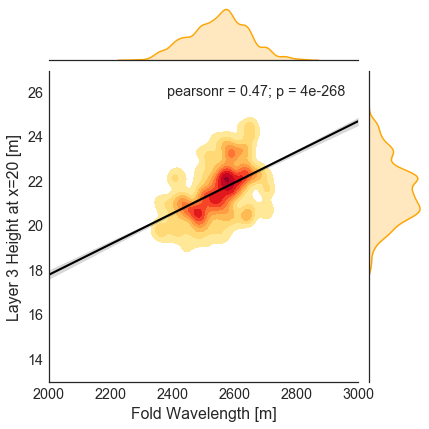

In [14]:
sns.set_style("white")
sns.set_context("paper", font_scale=fs)

p2 = sns.jointplot(data.db.trace("Fold_Wavelength")[:],
                   data.db.trace("Layer3_x20_y0")[:], kind="kde",
                   xlim=(2000,3000), ylim=(13,27), shade_lowest=False, marginal_kws={'color': 'orange'}, cmap="YlOrRd",)
p2.set_axis_labels(xlabel="Fold Wavelength [m]", ylabel="Layer 3 Height at x=20 [m]")
p2.plot_joint(sns.regplot, scatter=False, color="black")
#p2.savefig("D:/lebobcrash/MyDocuments/GitHub/thesis_paper_latex/figures/PGM3_exp4_p1.pdf")

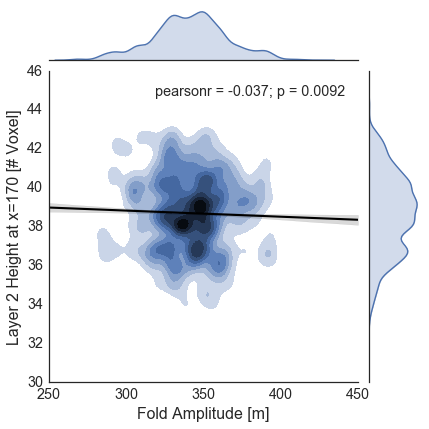

In [153]:
sns.set_style("white")
sns.set_context("paper", font_scale=fs)

p1 = sns.jointplot(data3.db.trace("fold_amplitude")[:],
                   data2.db.trace("Layer2_x170_y0")[:], kind="kde", shade_lowest=False, xlim=(250,450), ylim=(30,46))

p1.set_axis_labels(xlabel="Fold Amplitude [m]", ylabel="Layer 2 Height at x=170 [# Voxel]")
p1.plot_joint(sns.regplot, scatter=False, color="black")
p1.savefig("D:/lebobcrash/MyDocuments/GitHub/thesis_paper_latex/figures/PGM3_exp3_p2.pdf")

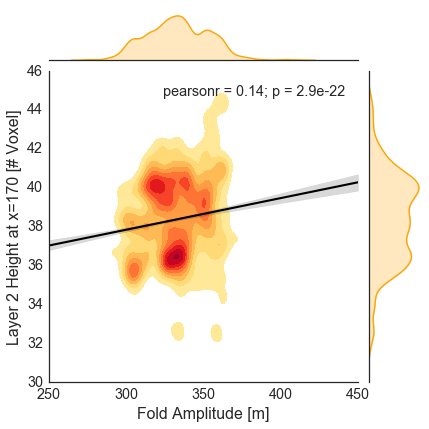

In [52]:
sns.set_style("white")
sns.set_context("paper", font_scale=fs)

p2 = sns.jointplot(data.db.trace("Fold_Amplitude")[:],data.db.trace("Layer2_x170_y0")[:]
                   , kind="kde", xlim=(250,450), ylim=(30,46)
                   , marginal_kws={'color': 'orange'}, cmap="YlOrRd", shade_lowest=False)
p2.set_axis_labels(xlabel="Fold Amplitude [m]", ylabel="Layer 2 Height at x=170 [# Voxel]")
p2.plot_joint(sns.regplot, scatter=False, color="black")
p2.savefig("D:/lebobcrash/MyDocuments/GitHub/thesis_paper_latex/figures/PGM3_exp4_p2.pdf")

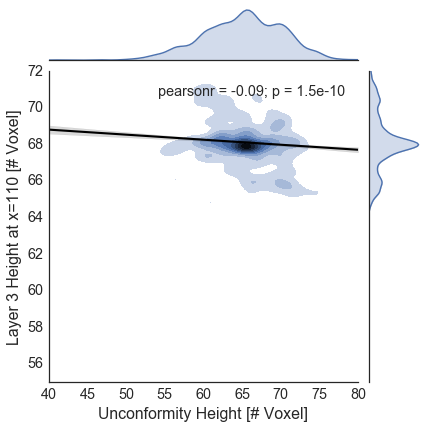

In [171]:
sns.set_style("white")
sns.set_context("paper", font_scale=fs)

p1 = sns.jointplot(data3.db.trace("unconformity_height")[:]/10,
                   data2.db.trace("Layer3_x110_y0")[:], kind="kde", shade_lowest=False, xlim=(40,80), ylim=(55,72))

p1.set_axis_labels(xlabel="Unconformity Height [# Voxel]", ylabel="Layer 3 Height at x=110 [# Voxel]")
p1.plot_joint(sns.regplot, scatter=False, color="black")
p1.savefig("D:/lebobcrash/MyDocuments/GitHub/thesis_paper_latex/figures/PGM3_exp3_p3.pdf")

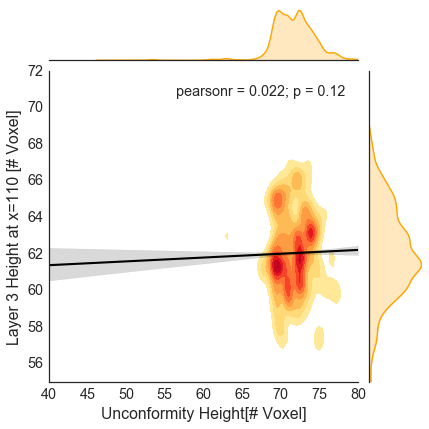

In [53]:
sns.set_style("white")
sns.set_context("paper", font_scale=fs)

p2 = sns.jointplot(data.db.trace("Unconformity_Z")[:]/10,data.db.trace("Layer3_x110_y0")[:]
                   , kind="kde", 
                   marginal_kws={'color': 'orange'}, cmap="YlOrRd", shade_lowest=False, xlim=(40,80), ylim=(55,72))
p2.set_axis_labels(xlabel="Unconformity Height[# Voxel]", ylabel="Layer 3 Height at x=110 [# Voxel]")
p2.plot_joint(sns.regplot, scatter=False, color="black")
p2.savefig("D:/lebobcrash/MyDocuments/GitHub/thesis_paper_latex/figures/PGM3_exp4_p3.pdf")

In [24]:
data3.prior_trace_names

['fold_amplitude',
 'fold_wavelength',
 'layer2_height',
 'layer3_height',
 'unconformity_height',
 'unconformity_rotation',
 'pynoddy_topology']

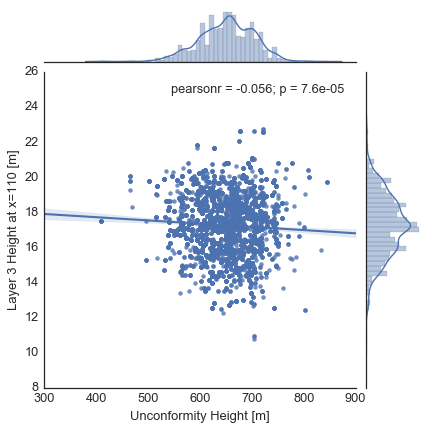

In [118]:
p2 = sns.jointplot(data3.db.trace("unconformity_height")[:],
                   data2.db.trace("Layer3_x170_y0")[:], kind="reg")#, stat_func=None,
                  #alpha=0.5, marker="o")#, xlim=(300,900), ylim=(50,75))
p2.set_axis_labels(xlabel="Unconformity Height [m]", ylabel="Layer 3 Height at x=110 [m]", fontsize=13)
#p2.savefig("D:/lebobcrash/MyDocuments/GitHub/thesis_paper_latex/figures/PGM3_exp3_jointplot.pdf")

In [108]:
sns.jointplot?

### Load Priors for Visualization

In [7]:
noddy_prior_dict = Utility.load_priors("PGM2_pynoddy_priors.json")
gempy_prior_interfaces = np.load("mean_prior_interfaces.npy")

In [4]:
layer3height_prior = pymc.Normal("l3hp", gempy_prior_interfaces[4][2], 1./np.square(gempy_prior_interfaces[4][2]/10))
unconf_z_prior = pymc.Normal("uzp", noddy_prior_dict["Unconformity_Z"]["mean"], 1./np.square(noddy_prior_dict["Unconformity_Z"]["stdev"]))

In [5]:
l3hp = np.array([layer3height_prior.random() for i in range(5000)])
uzp = np.array([unconf_z_prior.random() for i in range(5000)])

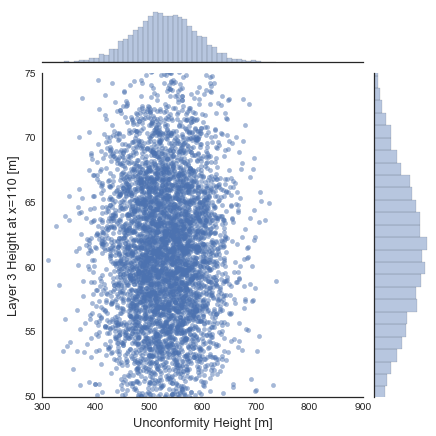

In [157]:
p3 = sns.jointplot(uzp,
              l3hp, kind="scatter", stat_func=None,
              alpha=0.5, marker="o", xlim=(300,900), ylim=(50,75))
p3.set_axis_labels(xlabel="Unconformity Height [m]", ylabel="Layer 3 Height at x=110 [m]", fontsize=13)
p3.savefig("D:/lebobcrash/MyDocuments/GitHub/thesis_paper_latex/figures/PGM3_prior_jointplot.pdf")

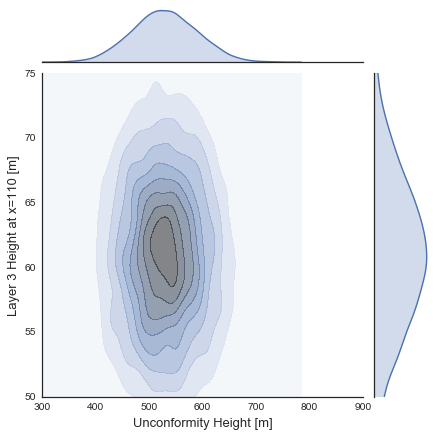

In [13]:
p31 = sns.jointplot(uzp,
              l3hp, kind="kde", stat_func=None,
              alpha=0.5, xlim=(300,900), ylim=(50,75))
p31.set_axis_labels(xlabel="Unconformity Height [m]", ylabel="Layer 3 Height at x=110 [m]", fontsize=13)
p31.savefig("D:/lebobcrash/MyDocuments/GitHub/thesis_paper_latex/figures/PGM3_prior_jointplot_kde.pdf")